In [129]:
# import important libraries for this project
# sklearn is the machine learning library to implement logistic regression

import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score

In [130]:
#loading dataset into jupyter using pandas
trans_data = pd.read_csv('C:/Users/DELL/Downloads/Fraud.csv')

In [131]:
# get first 5 entries of the dataset
trans_data.head()

,step,type,amount,nameOrig,oldbalanceOrg,newbalanceOrig,nameDest,oldbalanceDest,newbalanceDest,isFraud,isFlaggedFraud
0,1,PAYMENT,9839.64,C1231006815,170136.0,160296.36,M1979787155,0.0,0.0,0,0
1,1,PAYMENT,1864.28,C1666544295,21249.0,19384.72,M2044282225,0.0,0.0,0,0
2,1,TRANSFER,181.00,C1305486145,181.0,0.00,C553264065,0.0,0.0,1,0
3,1,CASH_OUT,181.00,C840083671,181.0,0.00,C38997010,21182.0,0.0,1,0
4,1,PAYMENT,11668.14,C2048537720,41554.0,29885.86,M1230701703,0.0,0.0,0,0


In [132]:
# This is an axample of labelled data
trans_data.tail()

,step,type,amount,nameOrig,oldbalanceOrg,newbalanceOrig,nameDest,oldbalanceDest,newbalanceDest,isFraud,isFlaggedFraud
6362615,743,CASH_OUT,339682.13,C786484425,339682.13,0.0,C776919290,0.00,339682.13,1,0
6362616,743,TRANSFER,6311409.28,C1529008245,6311409.28,0.0,C1881841831,0.00,0.00,1,0
6362617,743,CASH_OUT,6311409.28,C1162922333,6311409.28,0.0,C1365125890,68488.84,6379898.11,1,0
6362618,743,TRANSFER,850002.52,C1685995037,850002.52,0.0,C2080388513,0.00,0.00,1,0
6362619,743,CASH_OUT,850002.52,C1280323807,850002.52,0.0,C873221189,6510099.11,7360101.63,1,0


In [133]:
# understand columns and their datatypes
trans_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 6362620 entries, 0 to 6362619
Data columns (total 11 columns):
 #   Column          Dtype  
---  ------          -----  
 0   step            int64  
 1   type            object 
 2   amount          float64
 3   nameOrig        object 
 4   oldbalanceOrg   float64
 5   newbalanceOrig  float64
 6   nameDest        object 
 7   oldbalanceDest  float64
 8   newbalanceDest  float64
 9   isFraud         int64  
 10  isFlaggedFraud  int64  
dtypes: float64(5), int64(3), object(3)
memory usage: 534.0+ MB


In [134]:
# The flagged fraud data is incredibly small compared to the entire dataset

trans_data['isFlaggedFraud'].value_counts()

0    6362604
1         16
Name: isFlaggedFraud, dtype: int64

## Checking missing values

In [135]:
# checking for null/missing values
# there are no null values

trans_data.isnull().sum()

step              0
type              0
amount            0
nameOrig          0
oldbalanceOrg     0
newbalanceOrig    0
nameDest          0
oldbalanceDest    0
newbalanceDest    0
isFraud           0
isFlaggedFraud    0
dtype: int64

In [136]:
# distibution of fraud transactions with legitimate transactions 
# 0 = legit, 1 = fraud

trans_data['isFraud'].value_counts()  

0    6354407
1       8213
Name: isFraud, dtype: int64

## Data Analysis/Transformation

In [137]:
# data is very unequally distributed (unbalanced)
# Created two variables that stored legit and fraud transactions respectively

legit = trans_data[trans_data.isFraud == 0]
fraud = trans_data[trans_data.isFraud == 1]

In [138]:
# Two datasets created from trans data

print(legit.shape)
print(fraud.shape)

(6354407, 11)
(8213, 11)


In [139]:
# Let's check if there is any flagged calues in fraud dataset

fraud['isFlaggedFraud'].value_counts()
# All flagged fraud values are in the fraud dataset

0    8197
1      16
Name: isFlaggedFraud, dtype: int64

In [140]:
# Understanding the differences between fraud and legit
fraud.type.describe()

count         8213
unique           2
top       CASH_OUT
freq          4116
Name: type, dtype: object

In [141]:
# two kinds of transactions are causing all frauds
fraud.type.unique()

array(['TRANSFER', 'CASH_OUT'], dtype=object)

In [142]:
legit.type.describe()
legit.type.unique()

array(['PAYMENT', 'DEBIT', 'CASH_OUT', 'TRANSFER', 'CASH_IN'],
      dtype=object)

In [143]:
# distribution of amount within different quartiles
# 50% of values are less than 74,684.72

legit.amount.describe()

count    6.354407e+06
mean     1.781970e+05
std      5.962370e+05
min      1.000000e-02
25%      1.336840e+04
50%      7.468472e+04
75%      2.083648e+05
max      9.244552e+07
Name: amount, dtype: float64

In [144]:
# important statistical evaluations
# the mean here is much larger than legit trans

fraud.amount.describe()

count    8.213000e+03
mean     1.467967e+06
std      2.404253e+06
min      0.000000e+00
25%      1.270913e+05
50%      4.414234e+05
75%      1.517771e+06
max      1.000000e+07
Name: amount, dtype: float64

In [145]:
trans_data.groupby('isFraud').mean() 

,step,amount,oldbalanceOrg,newbalanceOrig,oldbalanceDest,newbalanceDest,isFlaggedFraud
isFraud,,,,,,,
0,243.235663,1.781970e+05,8.328287e+05,855970.228109,1.101421e+06,1.224926e+06,0.000000
1,368.413856,1.467967e+06,1.649668e+06,192392.631836,5.442496e+05,1.279708e+06,0.001948


## Visualization

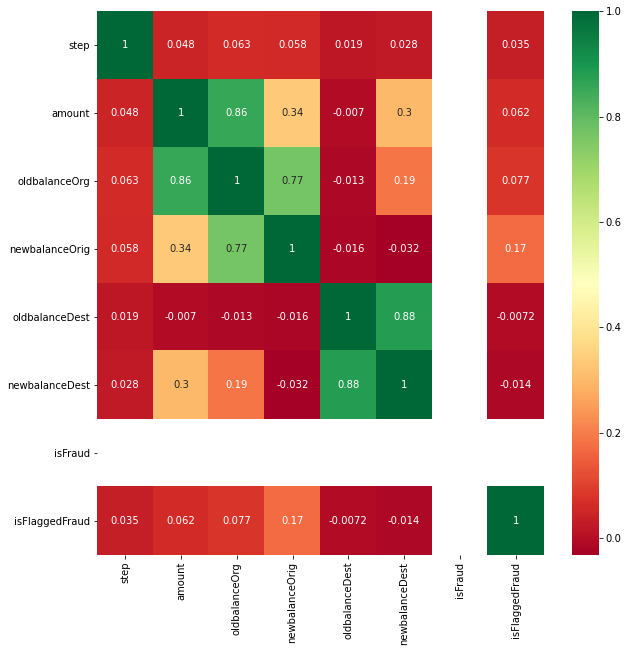

In [146]:
## Correlation
# Visualizing and to trying understand correlation between parameters
import seaborn as sns
#get correlations of each features in dataset
corrmat = fraud.corr()
top_corr_features = corrmat.index
plt.figure(figsize=(10,10))
#plot heat map
g=sns.heatmap(fraud[top_corr_features].corr(),annot=True,cmap="RdYlGn")

# There are few areas of strong positive correlations like amount/oldbalanceOrg, amount/newbalanceDest
# We can find some key factors that predict fraudulent customer

## Sampling and Concatenating

In [147]:
# Build a sample dataset containing similar distribution of normal transactions and Fraudulent Transactions
# Number of Fraudulent Transactions --> 8213

legit_sample = legit.sample(n=8213)

In [148]:
# Concatenating two DataFrames

new_data = pd.concat([legit_sample, fraud], axis=0)
new_data.head()
# all values in head() are legit and fraud in tail()

,step,type,amount,nameOrig,oldbalanceOrg,newbalanceOrig,nameDest,oldbalanceDest,newbalanceDest,isFraud,isFlaggedFraud
4125892,302,TRANSFER,2726305.79,C853124403,0.0,0.00,C754586000,2983604.79,5709910.59,0,0
3730853,278,CASH_OUT,175935.02,C816132434,5048.0,0.00,C1924857396,567447.00,743382.01,0,0
4280444,307,TRANSFER,1132746.84,C1997410948,5871.0,0.00,C1987520516,0.00,1132746.84,0,0
973661,44,CASH_OUT,147175.45,C622137375,0.0,0.00,C992460673,1738093.63,1885269.08,0,0
2756624,212,CASH_OUT,141541.47,C982666190,451892.0,310350.53,C645743990,7103.88,148645.34,0,0


In [149]:
new_data['isFraud'].value_counts()

0    8213
1    8213
Name: isFraud, dtype: int64

In [150]:
new_data.groupby('isFraud').mean()

,step,amount,oldbalanceOrg,newbalanceOrig,oldbalanceDest,newbalanceDest,isFlaggedFraud
isFraud,,,,,,,
0,243.009132,1.845945e+05,8.297283e+05,851686.464136,1.158883e+06,1.292894e+06,0.000000
1,368.413856,1.467967e+06,1.649668e+06,192392.631836,5.442496e+05,1.279708e+06,0.001948


In [151]:
# dropping isFraud column in X and other non-numeric data from the dataset 

X = new_data.drop(columns=['isFraud','type', 'nameOrig','nameDest'], axis=1)
Y = new_data['isFraud']

print(Y)

4125892    0
3730853    0
4280444    0
973661     0
2756624    0
          ..
6362615    1
6362616    1
6362617    1
6362618    1
6362619    1
Name: isFraud, Length: 16426, dtype: int64


In [152]:
X.head()

,step,amount,oldbalanceOrg,newbalanceOrig,oldbalanceDest,newbalanceDest,isFlaggedFraud
4125892,302,2726305.79,0.0,0.00,2983604.79,5709910.59,0
3730853,278,175935.02,5048.0,0.00,567447.00,743382.01,0
4280444,307,1132746.84,5871.0,0.00,0.00,1132746.84,0
973661,44,147175.45,0.0,0.00,1738093.63,1885269.08,0
2756624,212,141541.47,451892.0,310350.53,7103.88,148645.34,0


## Implementing Logistic Regression

In [153]:
# Split the data into Training data & Testing Data

X_train, X_test, Y_train, Y_test = train_test_split(X, Y, test_size=0.2, stratify=Y, random_state=2)

In [154]:
# 75% of data goes for training, 25% for testing

print(X.shape, X_train.shape, X_test.shape)

(16426, 7) (13140, 7) (3286, 7)


In [155]:
# Logistic Regression
model = LogisticRegression()

In [156]:
model.fit(X_train, Y_train)

LogisticRegression()

In [157]:
# accuracy on training data

X_train_prediction = model.predict(X_train)
training_data_accuracy = accuracy_score(X_train_prediction, Y_train)

In [158]:
print('Accuracy on Training data : ', training_data_accuracy)

Accuracy on Training data :  0.9070776255707762


In [159]:
# accuracy on test data
X_test_prediction = model.predict(X_test)
test_data_accuracy = accuracy_score(X_test_prediction, Y_test)

In [160]:
print('Accuracy score on Test Data : ', test_data_accuracy)

# These actions have been implemented, and the accuracy will determine that they work

Accuracy score on Test Data :  0.9050517346317711


In [161]:
# We can check precision, recall,f1-score using classification report

from sklearn.metrics import classification_report
print(classification_report(X_test_prediction, Y_test))

              precision    recall  f1-score   support

           0       0.92      0.90      0.91      1679
           1       0.89      0.91      0.90      1607

    accuracy                           0.91      3286
   macro avg       0.91      0.91      0.91      3286
weighted avg       0.91      0.91      0.91      3286



In [164]:
# 1505 and 1469 are TP and TN respectively. 138 and 174 are FP and FN
from sklearn.metrics import confusion_matrix

print(confusion_matrix(X_test_prediction, Y_test))

[[1505  174]
 [ 138 1469]]
